In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
data_dir = "."
normal_dir = os.path.join(data_dir, "Normal")
tumor_dir = os.path.join(data_dir, "Tumor")

In [3]:
IMG_SIZE = 128

data = []
labels = []

def load_images(folder, label):
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        try:
            img = cv2.imread(img_path)
            img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            
            data.append(img_resized)
            labels.append(label)
        except Exception as err:
            print(f"Error loading image {img_path}: {err}")
            
load_images(normal_dir, 0)
load_images(tumor_dir, 1)

data = np.array(data) / 255
labels = np.array(labels)

print(f"Data shape: {data.shape}")
print(f"Labels shape: {labels.shape}")

Data shape: (10000, 128, 128, 3)
Labels shape: (10000,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (8000, 128, 128, 3)
X_test shape: (2000, 128, 128, 3)


In [5]:
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Second convolutional block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Third convolutional block
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten the results to feed into a dense layer
    layers.Flatten(),
    
    # A fully connected layer
    layers.Dense(128, activation='relu'),
    
    # Output layer: 1 neuron with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Print the model summary to see the architecture
model.summary()

/Users/ron/Desktop/Cancer Detection Project - 1/Kidney Cancer/kidney_venv/lib/python3.13/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 329ms/step - accuracy: 1.0000 - loss: 7.8979e-05 - val_accuracy: 1.0000 - val_loss: 1.1884e-04
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 173ms/step - accuracy: 1.0000 - loss: 2.4660e-05 - val_accuracy: 1.0000 - val_loss: 1.7143e-04
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 46s 183ms/step - accuracy: 1.0000 - loss: 1.6103e-05 - val_accuracy: 1.0000 - val_loss: 1.5708e-04
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 196ms/step - accuracy: 1.0000 - loss: 1.2137e-05 - val_accuracy: 1.0000 - val_loss: 1.3050e-04
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 49s 194ms/step - accuracy: 1.0000 - loss: 9.5475e-06 - val_accuracy: 1.0000 - val_loss: 1.3519e-04


In [9]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 1.0000 - loss: 1.3519e-04
Test Accuracy: 100.00%


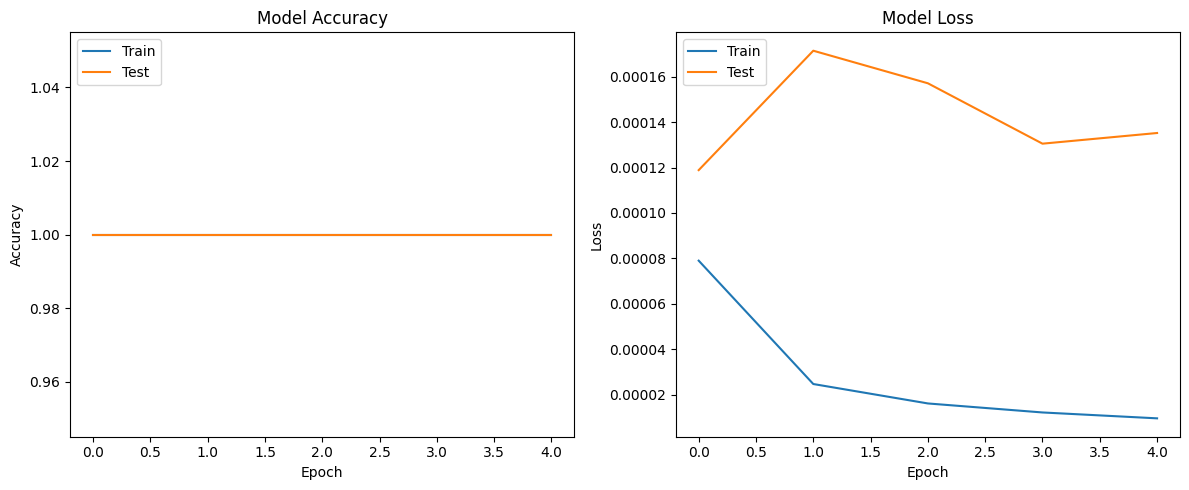

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


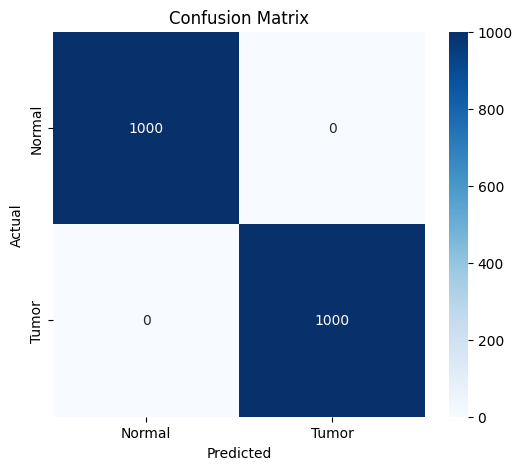


Classification Report:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00      1000
       Tumor       1.00      1.00      1.00      1000

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32") # Convert probabilities to 0 or 1

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Tumor'], 
            yticklabels=['Normal', 'Tumor'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print a detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Tumor']))

In [12]:
# Saving the model
model.save("kindey_cancer.h5")

In [13]:
from keras.models import load_model

model = load_model("../models/kindey_cancer.h5")

In [14]:
loss, accuracy = model.evaluate(X_test, y_test) 
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 1.0000 - loss: 1.3519e-04
Test Accuracy: 100.00%
